<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Marhia José Granada Restrepo
##1094890344

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.

# 1.0 Análisis del data frame


###1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

In [2]:
url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


###2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Hay 207 datos faltantes, todos en la columna total_bedrooms

###3. Determinar los elementos únicos dentro de la columna ocean_proximity.


In [5]:
ocea_proximity = df["ocean_proximity"].unique()
ocea_proximity

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

###4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


In [6]:
cols = ["housing_median_age",   "total_rooms",  "total_bedrooms",   "population",   "households",   "median_income",    "median_house_value"]
df.groupby("ocean_proximity")[cols].mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


###5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

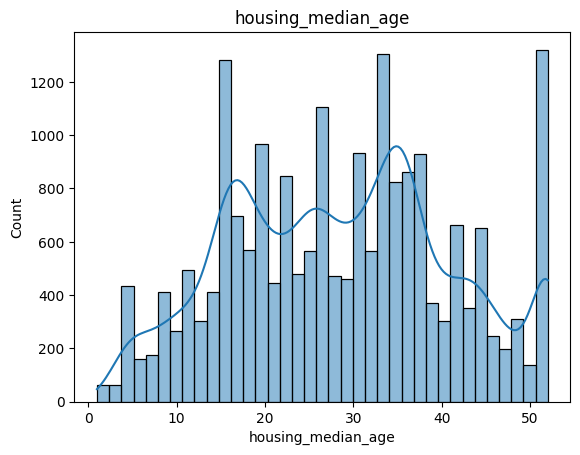

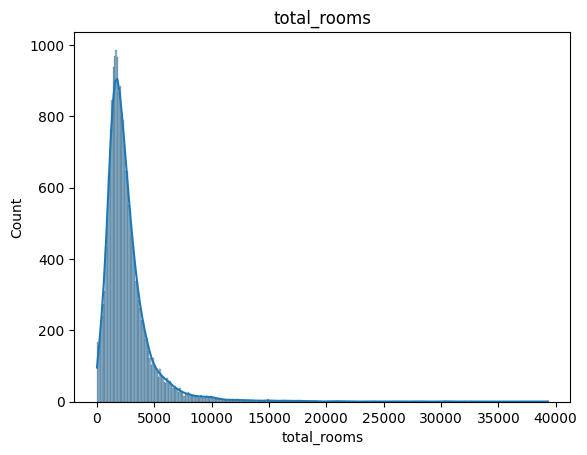

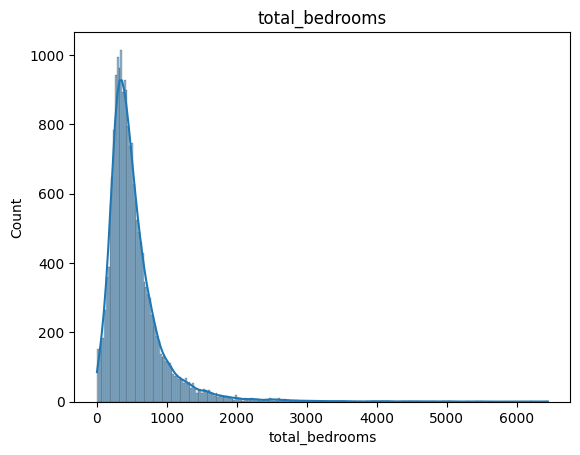

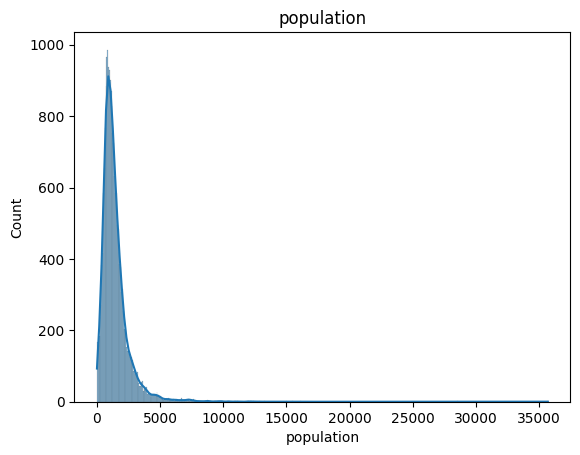

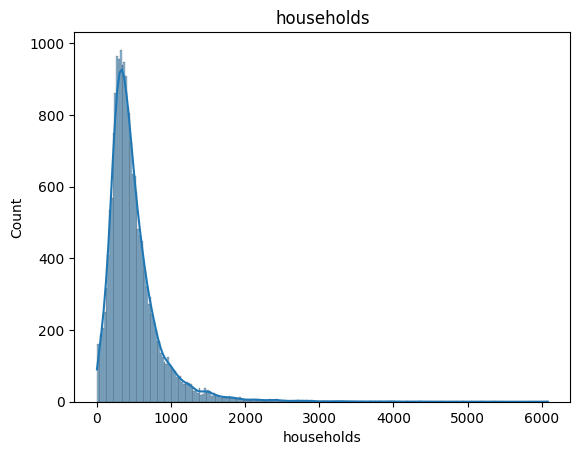

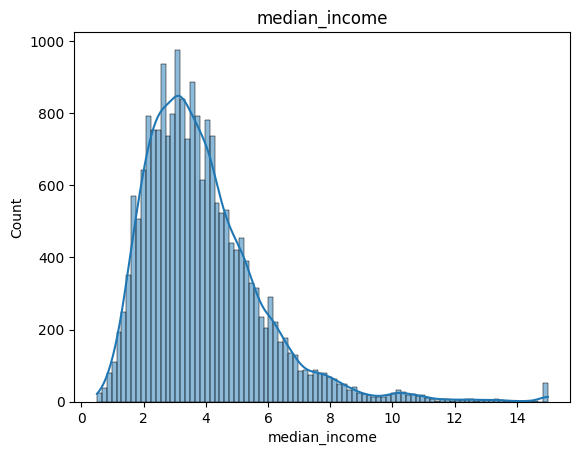

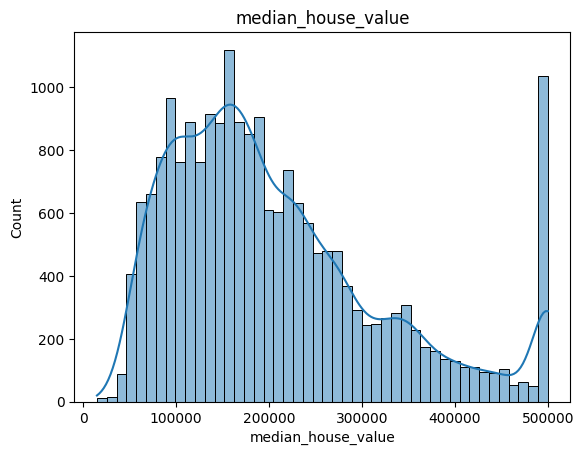

In [7]:
for col in cols:
  sns.histplot(data=df, x=col, kde=True)
  plt.title(col)
  plt.show()

###7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

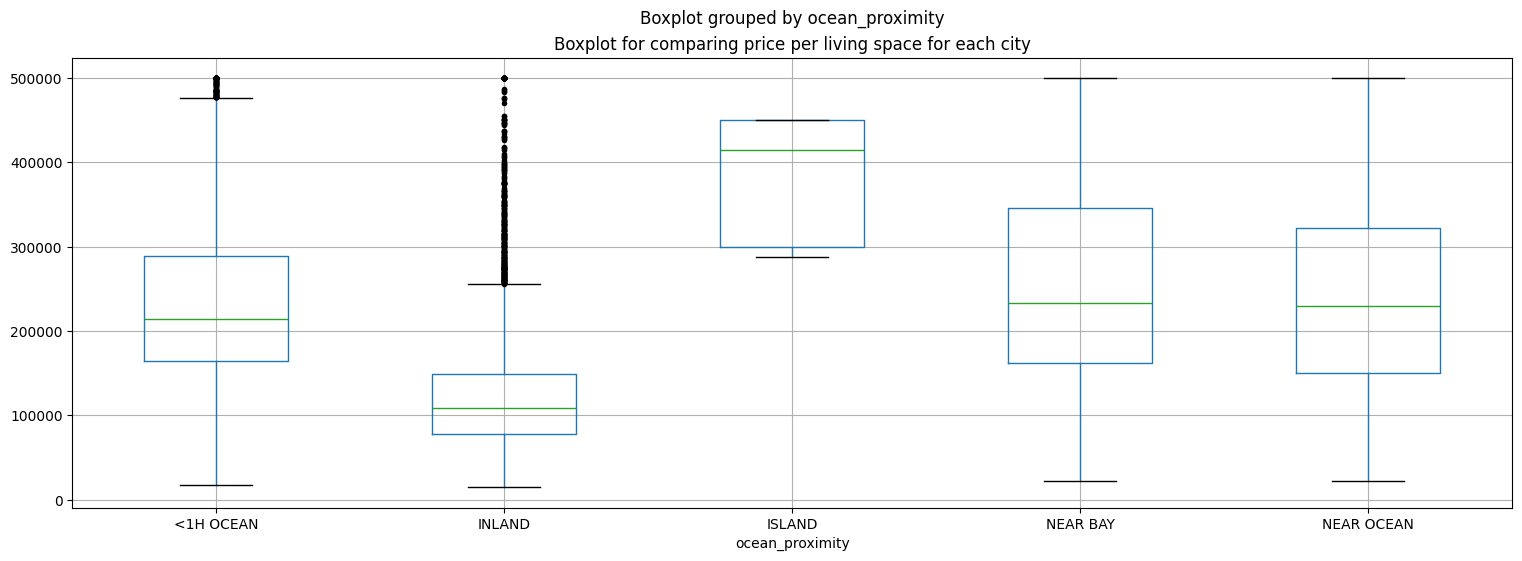

In [8]:
# draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
# set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

###8. Determina la matrix de correlación.



[Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

In [9]:
columns = df.columns
columns = columns.drop("ocean_proximity")
corr_matrix = df[columns].corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


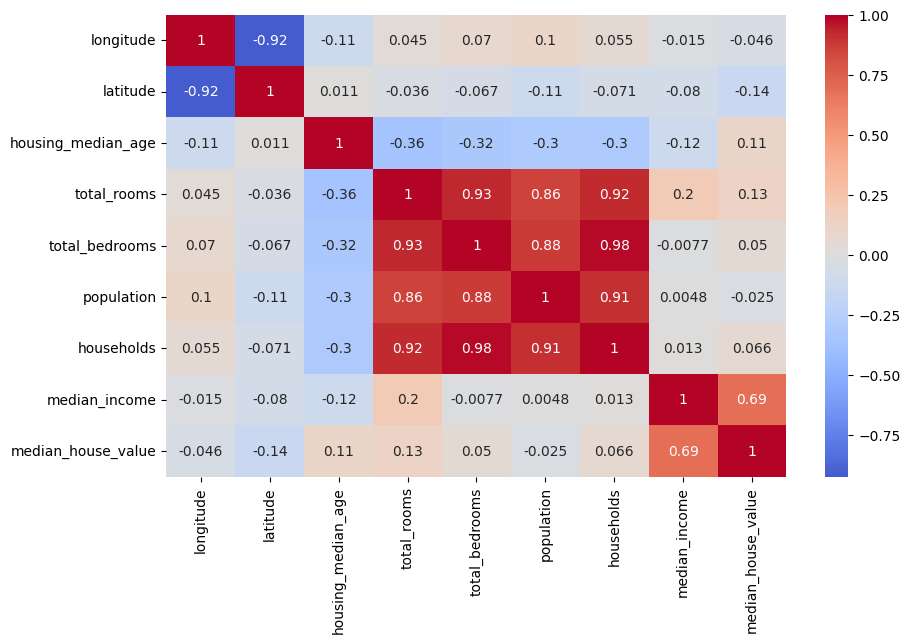

In [10]:
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

###9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

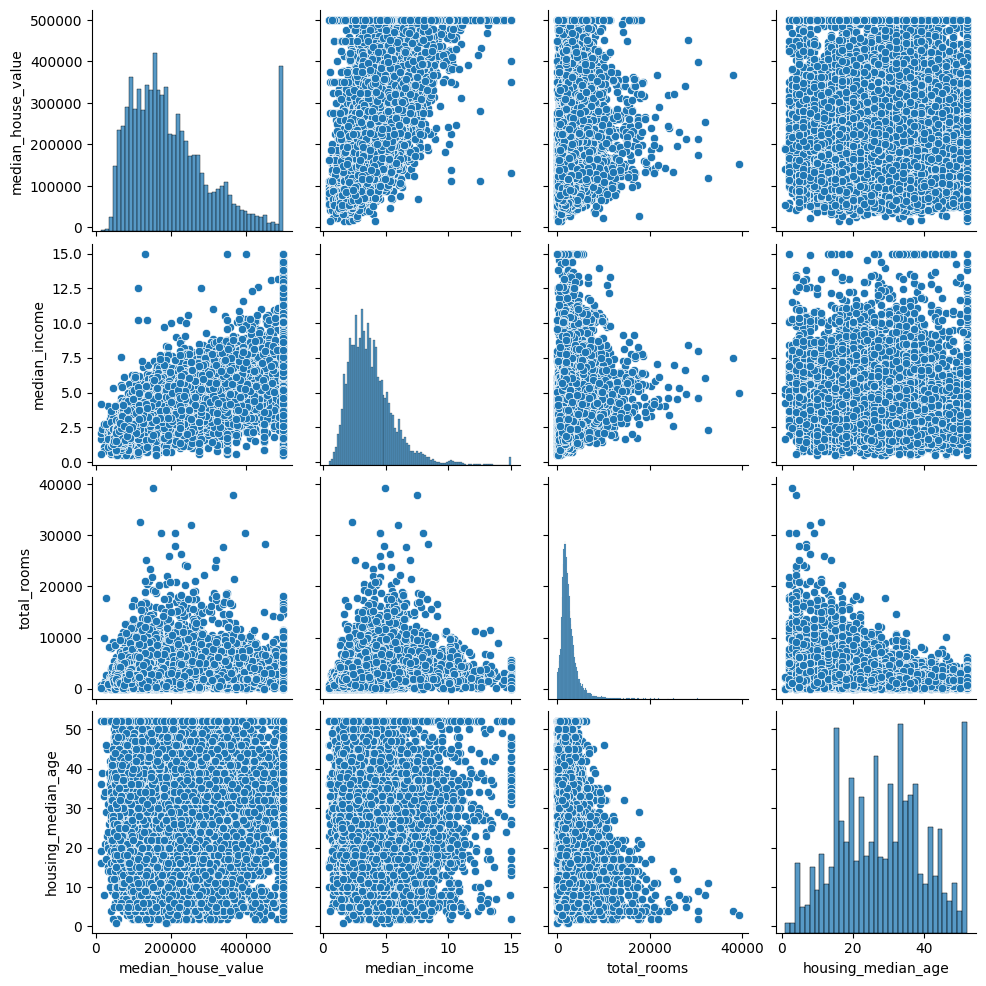

In [11]:
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
sns.pairplot(df[cols])

###10. Realiza un scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

<Axes: xlabel='longitude', ylabel='latitude'>

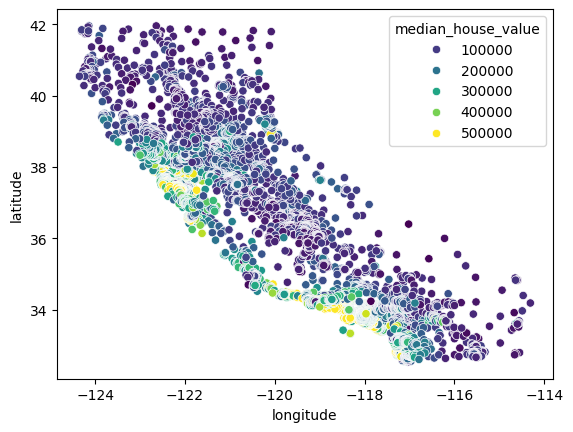

In [12]:
sns.scatterplot(data=df, x="longitude", y="latitude", hue="median_house_value", palette="viridis")

#2.0 Preparacion del data frame

###11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```


In [13]:
from sklearn.model_selection import train_test_split
# ¿Es significativa la muestra que se esta considerando?
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16512
4128


Este corte corre el riesgo de no ser representativo debido a imbalances presentes en el dataset, entonces hacemos un gráfico de los datos para comparar las distribuciones de el train_set y el test_set respecto al dataset completo:

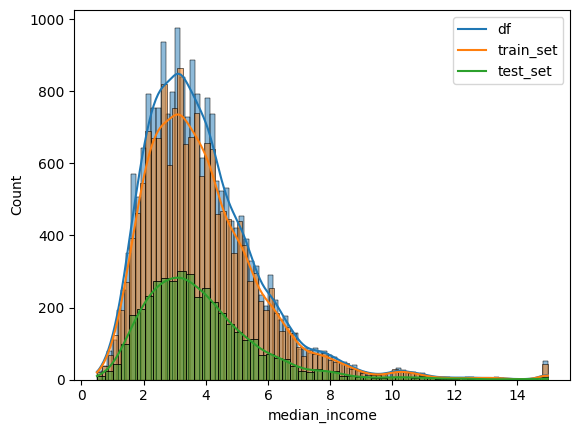

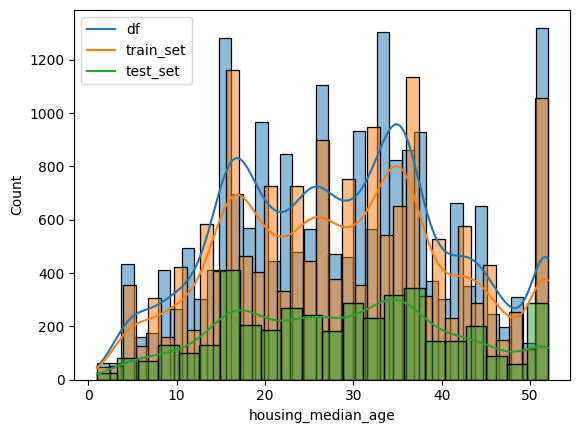

In [14]:
sns.histplot(data=df, x="median_income", kde=True)
sns.histplot(data=train_set, x="median_income", kde=True)
sns.histplot(data=test_set, x="median_income", kde=True)
plt.legend(["df", "train_set", "test_set"])
plt.show()
sns.histplot(data=df, x="housing_median_age", kde=True)
sns.histplot(data=train_set, x="housing_median_age", kde=True)
sns.histplot(data=test_set, x="housing_median_age", kde=True)
plt.legend(["df", "train_set", "test_set"])
plt.show()

Según estos gráficos, los datos mayormente mantienen sus distribuciones del data set inicial.

###12. División del dataset en grupos:




La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

<Axes: >

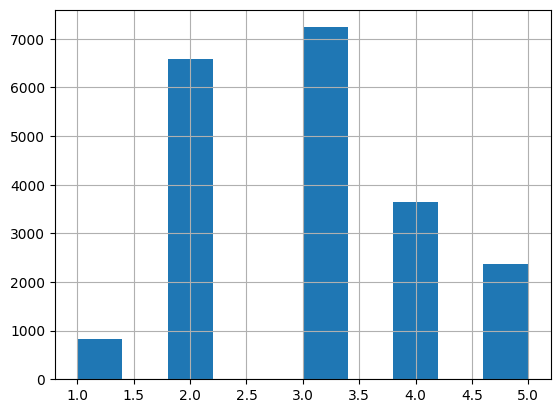

In [15]:
df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

df.income_cat.hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
#Apply stratified shuffle split
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [17]:
#Analizar:
fulldfprop = df["income_cat"].value_counts() / len(df)

strttrainprop = strat_train_set["income_cat"].value_counts() / len(strat_train_set)
testpercentage = strat_test_set["income_cat"].value_counts() / len(strat_test_set)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 7)

randomtrainprop = train_set["income_cat"].value_counts() / len(train_set)

#Podemos ver las proporciones de las categorias de income acorde al dataset completo, el stratified split y al random split.
print(fulldfprop)
print(strttrainprop)
print(randomtrainprop)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64
income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64
income_cat
3    0.348716
2    0.324188
4    0.173147
5    0.114159
1    0.039789
Name: count, dtype: float64


In [18]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

compare_props.head()

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,0.015195
3,0.350581,0.350533,0.358527,2.266446,0.013820
4,0.176308,0.176357,0.167393,5.056334,0.027480
5,0.114438,0.114341,0.109496,4.318374,0.084674


Con los datos de la tabla anterior se puede ver claramente que los datos del random split presentan proporciornes más distintas de income que los datos con el stratified split, que mantiene estas proporciones muy similares a las originales. Es importante que estos datos mantengan las proporciones originales porque sino el modelo corre el riesgo de sesgarse

###13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```

In [19]:
strat_train_set["rooms_per_household"] = strat_train_set["total_rooms"]/strat_train_set["households"]
strat_train_set["bedrooms_per_room"] = strat_train_set["total_bedrooms"]/strat_train_set["total_rooms"]
strat_train_set["population_per_household"]=strat_train_set["population"]/strat_train_set["households"]
#Test set
strat_test_set["rooms_per_household"] = strat_test_set["total_rooms"]/strat_test_set["households"]
strat_test_set["bedrooms_per_room"] = strat_test_set["total_bedrooms"]/strat_test_set["total_rooms"]
strat_test_set["population_per_household"]=strat_test_set["population"]/strat_test_set["households"]
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3,6.096552,0.182692,3.167241


#3.0 Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

In [20]:
strat_train_set.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,158
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [21]:
# df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
# df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna

#Se rellenan los espacios con la media para no perder filas
median = strat_train_set["total_bedrooms"].median()
q=strat_train_set["total_bedrooms"].fillna(median).copy()
q=pd.DataFrame(q)

q.isnull().sum()

,0
total_bedrooms,0


In [22]:
#Limpieza de los datos de train y test
from sklearn.impute import SimpleImputer

df_train_num = strat_train_set.drop("ocean_proximity", axis=1)

# fit en train
imp_mean = SimpleImputer(strategy="mean")
imp_mean.fit(df_train_num)

train_num_clean = imp_mean.transform(df_train_num)
train_num_clean = pd.DataFrame(train_num_clean,columns=df_train_num.columns,index=df_train_num.index)

#Volver a añadir las nuevas columnas (train)
train_num_clean["rooms_per_household"] = (train_num_clean["total_rooms"] / train_num_clean["households"])
train_num_clean["bedrooms_per_room"] = (train_num_clean["total_bedrooms"] / train_num_clean["total_rooms"])
train_num_clean["population_per_household"] = (train_num_clean["population"] / train_num_clean["households"])

df_test_num = strat_test_set.drop("ocean_proximity", axis=1)
test_num_clean = imp_mean.transform(df_test_num)
test_num_clean = pd.DataFrame(test_num_clean,columns=df_test_num.columns,index=df_test_num.index)

#Volver a añadir las nuevas columnas (test)
test_num_clean["rooms_per_household"] = (test_num_clean["total_rooms"] / test_num_clean["households"])
test_num_clean["bedrooms_per_room"] = (test_num_clean["total_bedrooms"] / test_num_clean["total_rooms"])
test_num_clean["population_per_household"] = (test_num_clean["population"] / test_num_clean["households"])

###14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```

In [23]:
print(imp_mean.statistics_)
print(train_num_clean.median())

[-1.19575635e+02  3.56393144e+01  2.86534036e+01  2.62253979e+03
  5.34914639e+02  1.41968738e+03  4.97011810e+02  3.87588428e+00
  2.07005322e+05  3.00678295e+00  5.44040595e+00  2.12872772e-01
  3.09646921e+00]
longitude                     -118.510000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2119.000000
total_bedrooms                 436.000000
population                    1164.000000
households                     408.000000
median_income                    3.541550
median_house_value          179500.000000
income_cat                       3.000000
rooms_per_household              5.232342
bedrooms_per_room                0.203184
population_per_household         2.817661
dtype: float64


En este conjunto de datos, la media supera claramente a la mediana en varias variables, lo cual indica distribuciones con sesgo positivo y presencia de valores extremos.

In [24]:
#Construye la matriz de características:
imp_mean.fit(train_num_clean)
X = imp_mean.transform(train_num_clean)
housing_tr = pd.DataFrame(X, columns=train_num_clean.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,2.0,5.485836,0.205784,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,5.0,6.927083,0.160714,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,2.0,5.393333,0.191595,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,2.0,3.886128,0.276505,1.859213
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,3.0,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,4.0,6.658342,0.184696,2.023976
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,2.0,5.571932,0.179977,3.363188
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,3.0,4.110465,0.234795,2.662791
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,3.0,6.297405,0.183835,2.411178


#4.0 Manejo de texto y atributos categóricos

###15.  ¿Qué realizan las siguientes lineas de código?



```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```

In [25]:
from sklearn.preprocessing import OneHotEncoder

housing_cat_train = strat_train_set[["ocean_proximity"]]
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_train)

housing_cat_train_1hot = cat_encoder.transform(housing_cat_train)
df_cat_train_1hot = pd.DataFrame(housing_cat_train_1hot, columns=cat_encoder.categories_[0], index=train_num_clean.index)
housing_train_ = train_num_clean.join(df_cat_train_1hot)
housing_train_

print(housing_cat_1hot)
print(cat_encoder.categories_)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [26]:
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
housing_tr_

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,2.0,5.485836,0.205784,3.168555,0.0,1.0,0.0,0.0,0.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,5.0,6.927083,0.160714,2.623698,0.0,0.0,0.0,0.0,1.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,2.0,5.393333,0.191595,2.223333,0.0,1.0,0.0,0.0,0.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,2.0,3.886128,0.276505,1.859213,0.0,0.0,0.0,0.0,1.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,3.0,6.096552,0.182692,3.167241,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,4.0,6.658342,0.184696,2.023976,1.0,0.0,0.0,0.0,0.0
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,2.0,5.571932,0.179977,3.363188,0.0,1.0,0.0,0.0,0.0
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,3.0,4.110465,0.234795,2.662791,1.0,0.0,0.0,0.0,0.0
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,3.0,6.297405,0.183835,2.411178,1.0,0.0,0.0,0.0,0.0


Estas líneas convierten la columna categórica ocean_proximity en varias columnas numéricas mediante one-hot encoding. Cada categoría se transforma en una nueva columna con valores 1 o 0 según si la fila pertenece a esa categoría.

#5.0 Escalamiento de variables

###16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```






In [27]:
cols=["longitude", "latitude",  "housing_median_age",   "total_rooms",\
      "total_bedrooms", "population",   "households",   "median_income",\
      "<1H OCEAN",  "INLAND",   "ISLAND",   "NEAR BAY", "NEAR OCEAN"]

housing_scale=housing_tr_[cols]
housing_scale

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)

housing_train_prepared = pd.DataFrame(X, columns = housing_scale.columns)
housing_train_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.0,1.0,0.0,0.0,0.0
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.0,0.0,0.0,0.0,1.0
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.0,1.0,0.0,0.0,0.0
3,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.0,0.0,0.0,0.0,1.0
4,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.725100,0.052072,0.254902,0.169380,0.197970,0.056700,0.186520,0.316554,1.0,0.0,0.0,0.0,0.0
16508,0.291833,0.634431,0.274510,0.200819,0.228737,0.133580,0.264376,0.159584,0.0,1.0,0.0,0.0,0.0
16509,0.162351,0.626993,0.921569,0.017831,0.026418,0.012753,0.031740,0.184811,1.0,0.0,0.0,0.0,0.0
16510,0.164343,0.613177,0.254902,0.080099,0.093106,0.033773,0.093167,0.254928,1.0,0.0,0.0,0.0,0.0


###17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

El Dataframe housing_train_prepared ya está listo, se ha ido realizando a lo largo del laboratorio, solo falta el dataframe housing_test_prepared, que se prepara a continuación:

In [28]:
#Preparar el test df (usando el código anterior, y solo cambiando los df que usa de train a test)

X = imp_mean.transform(test_num_clean)
housing_test = pd.DataFrame(X, columns=test_num_clean.columns, index=strat_test_set.index)

from sklearn.preprocessing import OneHotEncoder

housing_cat_test = strat_test_set[["ocean_proximity"]]
housing_cat_test_1hot = cat_encoder.transform(housing_cat_test)

df_cat_test_1hot = pd.DataFrame(housing_cat_test_1hot,columns=cat_encoder.categories_[0],index=test_num_clean.index)
housing_test_ = housing_test.join(df_cat_test_1hot)

cols=["longitude", "latitude",  "housing_median_age",   "total_rooms",\
      "total_bedrooms", "population",   "households",   "median_income",\
      "<1H OCEAN",  "INLAND",   "ISLAND",   "NEAR BAY", "NEAR OCEAN"]

housing_scale=housing_test_[cols]

from sklearn.preprocessing import MinMaxScaler

X = scaler.transform(housing_scale)
housing_test_prepared = pd.DataFrame(X, columns=housing_scale.columns)

Ahora revisamos housing_train_prepared y housing_test_prepared

In [29]:
housing_train_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.0,1.0,0.0,0.0,0.0
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.0,0.0,0.0,0.0,1.0
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.0,1.0,0.0,0.0,0.0
3,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.0,0.0,0.0,0.0,1.0
4,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,1.0,0.0,0.0,0.0,0.0


In [30]:
housing_test_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.593625,0.167906,0.549020,0.163835,0.162693,0.061128,0.178865,0.536662,1.0,0.0,0.0,0.0,0.0
1,0.391434,0.249734,0.450980,0.051229,0.049130,0.023880,0.052465,0.311030,1.0,0.0,0.0,0.0,0.0
2,0.587649,0.181722,0.686275,0.036806,0.043170,0.022562,0.050971,0.267858,1.0,0.0,0.0,0.0,0.0
3,0.622510,0.145590,0.666667,0.041893,0.052030,0.029962,0.055825,0.191094,1.0,0.0,0.0,0.0,0.0
4,0.725100,0.024442,0.725490,0.095971,0.098582,0.041817,0.114264,0.265720,0.0,0.0,0.0,0.0,1.0


1. ¿Qué puede concluir respecto al modelo empleado?

2. ¿El modelo de regresión lineal es valido para lo construido?

3. ¿Qué informacion nos da el score?

4. ¿Puede ser ajustado a otro modelo?

Para dar respuesta a estas preguntas, hacemos un pequeño entrenamiento del modelo usando LinearRegression de SkLearn:

In [31]:
train_labels = strat_train_set["median_house_value"].copy()
test_labels  = strat_test_set["median_house_value"].copy()

#Entrenar el modelo
lin_reg = LinearRegression()
lin_reg.fit(housing_train_prepared, train_labels)

#Predicciones
predictions = lin_reg.predict(housing_test_prepared)

#Evaluar
mse = mean_squared_error(test_labels, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_labels, predictions)

print("RMSE = ",rmse)
print("R^2 = ",r2)

RMSE =  67330.1726774954
R^2 =  0.6521675802844975


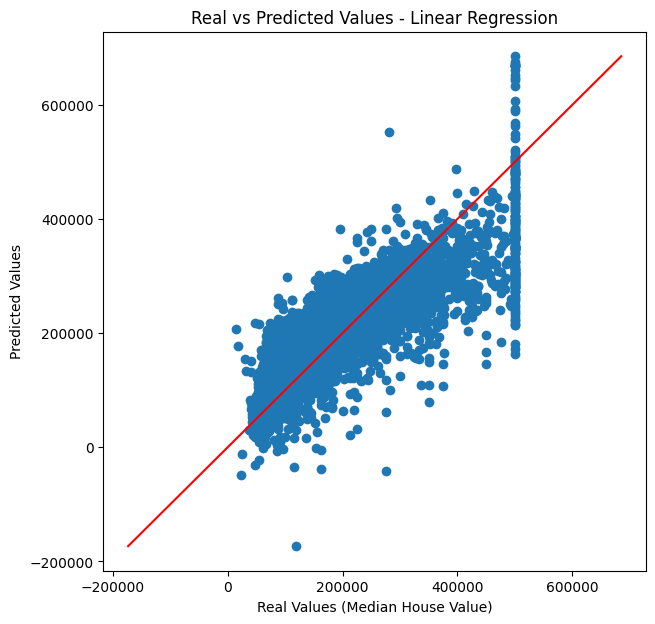

In [32]:
plt.figure(figsize=(7,7))

plt.scatter(test_labels, predictions)

plt.xlabel("Real Values (Median House Value)")
plt.ylabel("Predicted Values")
plt.title("Real vs Predicted Values - Linear Regression")

max_val = max(test_labels.max(), predictions.max())
min_val = min(test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r')

plt.show()

Respuestas:
1. El modelo logra capturar parte del comportamiento de los datos y sigue la tendencia general, pero no ofrece predicciones muy precisas. Funciona, pero tiene errores importantes en varios casos, especialmente para valores altos de las casas.

2. Sí, es válido en el sentido de que se pudo entrenar y genera predicciones coherentes. Sin embargo, no es el modelo más adecuado porque los datos tienen relaciones más complejas que una línea recta no puede representar del todo. Por eso su desempeño es limitado.

3. El score (R²) hallado de ~0.65 muestra que el modelo explica una parte considerable, pero todavía deja una fracción grande sin capturar.

4. Sí. Este problema podría mejorar con modelos que detecten mejor relaciones no lineales, como árboles de decisión, random forest o modelos más avanzados. La regresión lineal es una buena primera aproximación, pero no es la que obtiene el mejor rendimiento con este conjunto de datos.